#**Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

##**Objective**
Creating comprehensive customer profiles AeroFit treadmill product through descriptive analysis and Data Visualization.

Analayzing data given to reach with the help of two-way contingency tables. Fiding out onditional and marginal probabilities to focus on customer characteristics, enhancing product marketing skills and facilitating improved product recommendations and informed business decisions.

#**Product Portfolio**

Aerofit caters to a range of fitness levels with its treadmill offerings:

**KP281:** An entry-level treadmill priced at USD 1,500.

**KP481:** A mid-level treadmill for runners, priced at USD 1,750.

**KP781:** An advanced-feature treadmill priced at USD 2,500.

#**Dataset Features**

**The dataset contains the following features:**

**Product Purchased:** Identifies the specific Aerofit treadmill model (KP281, KP481, or KP781) purchased by the customer.

**Age:** The age of the customer in years.

**Gender:** The customer's gender (Male/Female).

**Education:** The number of years of education completed by the customer.

**Marital Status:** The customer's marital status (Single or Partnered).

**Usage:** The average number of times per week the customer intends to use the treadmill.

**Income:** The annual income of the customer (in USD).

**Fitness:** The customer's self-rated fitness level on a scale of 1 (poor) to 5 (excellent).

**Miles:** The average number of miles the customer expects to walk/run each week.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Dataset**

In [ ]:
aerofit = pd.read_csv("aerofit_treadmill.csv")
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#**Data Analysis**

In [ ]:
aerofit.shape

(180, 9)

In [ ]:
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#**Checking for Unique and Duplicate Values**

In [ ]:
# checking the unique values for columns
for i in aerofit.columns:
    print('Unique Values in',i,'column are :-')
    print(aerofit[i].unique())
    print('-'*70)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------------------------------------------------------
Unique Valu

In [ ]:
# Check for missing values
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#**Detect Outliers**


In [ ]:
continuous_var = ['Age', 'Income', 'Education', 'Usage', 'Fitness', 'Miles']
arr = {'25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,}

for key, value in arr.items():
    for var in continuous_var:
        print(f'{var} -> {key} : {np.percentile(aerofit[var], value):.2f}')

Age -> 25th percentile or Q1 : 24.00
Income -> 25th percentile or Q1 : 44058.75
Education -> 25th percentile or Q1 : 14.00
Usage -> 25th percentile or Q1 : 3.00
Fitness -> 25th percentile or Q1 : 3.00
Miles -> 25th percentile or Q1 : 66.00
Age -> 50th percentile or Q2 : 26.00
Income -> 50th percentile or Q2 : 50596.50
Education -> 50th percentile or Q2 : 16.00
Usage -> 50th percentile or Q2 : 3.00
Fitness -> 50th percentile or Q2 : 3.00
Miles -> 50th percentile or Q2 : 94.00
Age -> 75th percentile or Q3 : 33.00
Income -> 75th percentile or Q3 : 58668.00
Education -> 75th percentile or Q3 : 16.00
Usage -> 75th percentile or Q3 : 4.00
Fitness -> 75th percentile or Q3 : 4.00
Miles -> 75th percentile or Q3 : 114.75


In [ ]:
for var in continuous_var:
    # Calculate the IQR for the variable
    Q1 = np.percentile(aerofit[var], arr['25th percentile or Q1'])
    Q3 = np.percentile(aerofit[var], arr['75th percentile or Q3'])
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = aerofit[(aerofit[var] < lower_threshold) | (aerofit[var] > upper_threshold)]

    # Calculate the percentage of outliers
    outlier_percentage = round(len(outliers) / len(aerofit[var]) * 100, 2 )

    # Output the percentage of outliers
    print(f"IQR for {var}: {IQR}")
    print(f"Outlier above this Q3 {var} : {upper_threshold} \n")


IQR for Age: 9.0
Outlier above this Q3 Age : 46.5 

IQR for Income: 14609.25
Outlier above this Q3 Income : 80581.875 

IQR for Education: 2.0
Outlier above this Q3 Education : 19.0 

IQR for Usage: 1.0
Outlier above this Q3 Usage : 5.5 

IQR for Fitness: 1.0
Outlier above this Q3 Fitness : 5.5 

IQR for Miles: 48.75
Outlier above this Q3 Miles : 187.875 



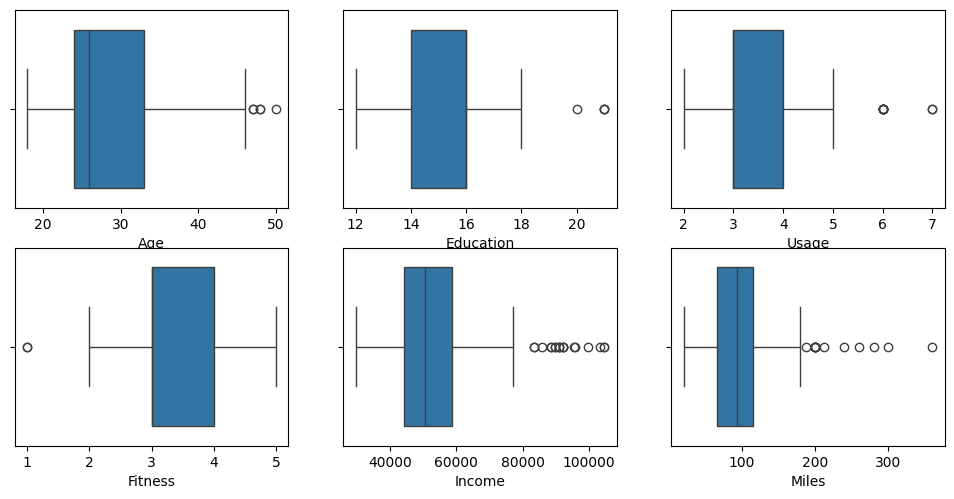

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12,4))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit, x="Usage", orient='h', ax=axis[0,2])
sns.boxplot(data=aerofit, x="Fitness", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit, x="Income", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit, x="Miles", orient='h', ax=axis[1,2])
plt.show()

##**Insights**
Based on graphical representation, both Income and Miles have a huge number of outliers. In contrast, the remaining variables display only a minor presence of outliers as compared to them.

# **Non-Graphical Analysis: Univariate & Bivariate analysis**

In [ ]:
categorical_columns= ['Product', 'Gender', 'MaritalStatus']
#Non-graphical analysis: Value counts for each categorical variable
for column in categorical_columns:
    print(f"{aerofit[column].value_counts()}\n")

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64



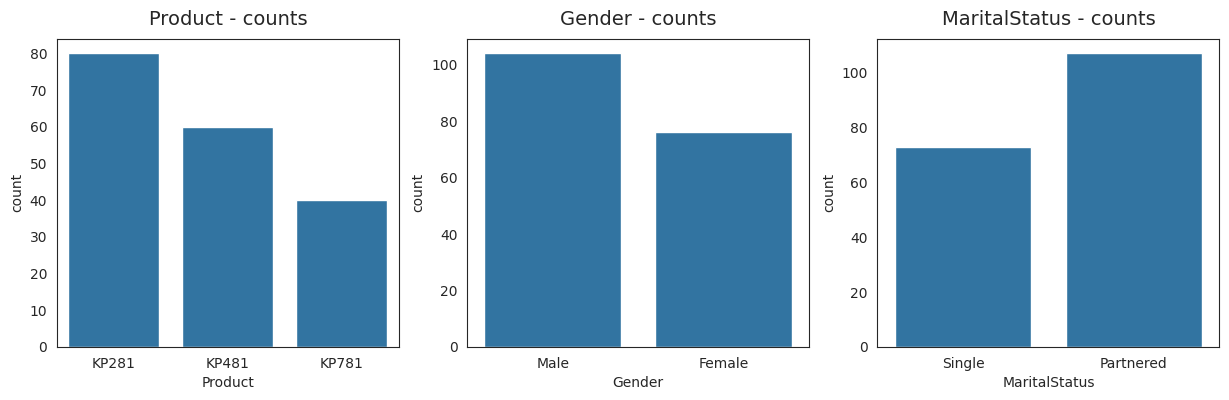

In [ ]:
 # Countplots for each categorical variable
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.countplot(data=aerofit, x='Product', ax=axs[0])
sns.countplot(data=aerofit, x='Gender', ax=axs[1])
sns.countplot(data=aerofit, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

##**Insights**

**Product Popularity:**

The KP281 emerges as the most frequently purchased treadmill, suggesting it might be a good value proposition for budget-conscious customers or those new to fitness.

**Gender Distribution:**

The data shows a higher proportion of males than females among Aerofit treadmill buyers. This might indicate a need for targeted marketing campaigns to attract more female customers.

**Marital Status:**

A higher percentage of partnered individuals appear in the data. It's valuable to explore if there's a correlation between marital status and factors like income or treadmill usage, indicating potential buying decisions for couples or families.

In [ ]:
df1 = aerofit[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(aerofit)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

##**Insights**
**Obervations**

**Product**

44.44% of the customers have purchased KP2821 product.

33.33% of the customers have purchased KP481 product.

22.22% of the customers have purchased KP781 product.

**Gender**

57.78% of the customers are Male.

**MaritalStatus**

59.44% of the customers are Partnered.

# **Bivariate Analysis**

## **Checking if features - Gender or MaritalStatus have any effect on the product purchased.**

In [ ]:
aerofit.groupby('MaritalStatus')['Product'].value_counts()
aerofit.groupby('Gender')['Product'].value_counts()
aerofit.groupby('Age')['Product'].value_counts()

Age  Product
18   KP281      1
19   KP281      3
     KP481      1
20   KP481      3
     KP281      2
               ..
47   KP781      1
     KP281      1
48   KP481      1
     KP781      1
50   KP281      1
Name: count, Length: 68, dtype: int64

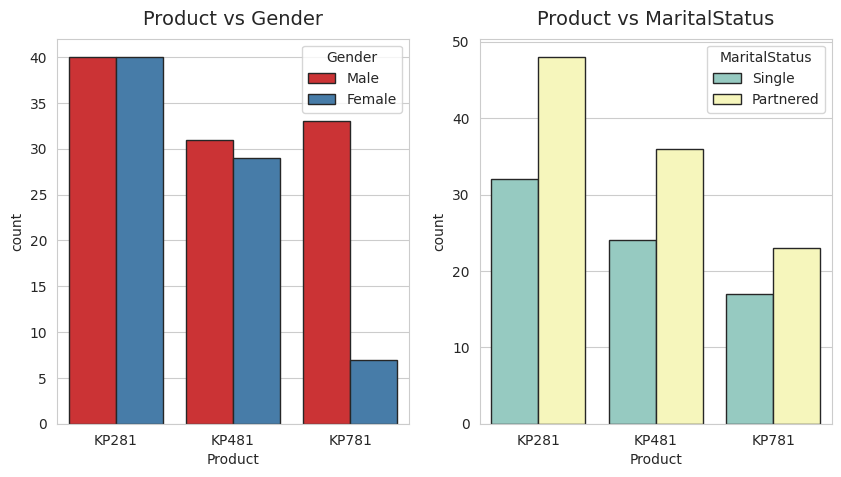

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(data=aerofit, x='Product', hue='Gender', edgecolor="0.15", palette='Set1', ax=axs[0])
sns.countplot(data=aerofit, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

#**Insights**

The data reveals a higher proportion of male customers compared to females. This suggests a need to explore reasons behind this trend and potentially develop strategies to attract more female buyers.

The analysis confirms that the KP281, the most frequently purchased treadmill, is likely popular for its affordability or suitability for beginners.





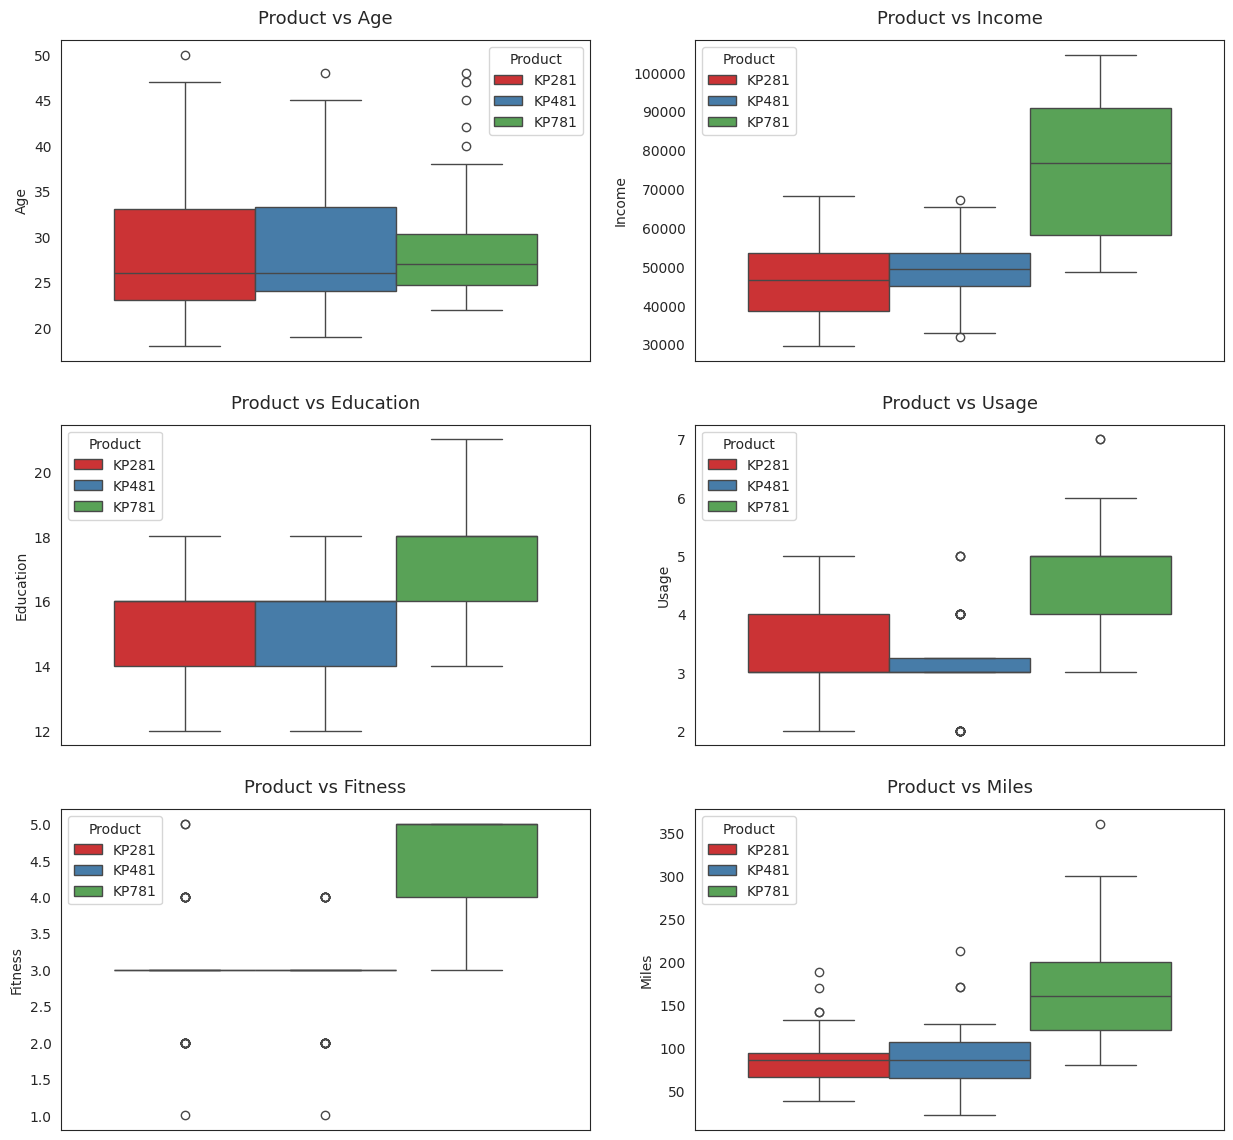

In [ ]:
# Product distribution on quantitative attribute
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit, hue='Product', y=continuous_var[count], ax=axs[i,j], palette='Set1')
        axs[i,j].set_title(f"Product vs {continuous_var[count]}", pad=12, fontsize=13)
        count += 1

#**Insights**

###**Age and Product Choice:**

Interestingly, customers buying the KP281 and KP481 treadmills share a similar median age. This suggests these models might cater to a broader age range or that age might not be a primary deciding factor for these products.
Customers between 25-30 years old show a higher preference for the KP781, potentially indicating a desire for more advanced features at this life stage.

###**Education and Product Selection:**

Customers with more than 16 years of education tend to favor the KP781. This might suggest a correlation between education level and disposable income, leading to a preference for the higher-end treadmill.

Customers with less than 16 years of education exhibit a similar buying pattern for KP281 and KP481. This could indicate these models are attractive for their affordability or suitability for beginners regardless of education level.

###**Usage, Fitness Level, Income, and Miles as Purchase Drivers:**

Customers planning to use the treadmill more frequently (over 4 times a week) gravitate towards the KP781. This suggests a link between usage intensity and preference for advanced features.

Customers with a higher self-rated fitness level (3 or above) are more likely to choose the KP781, indicating a desire for a treadmill that can support their fitness goals.

Customers with a higher income (USD 60,000+) tend to favor the KP781. This aligns with the assumption that the KP781 might be priced at a premium, catering to customers with a higher budget.

Customers expecting to walk or run significant distances (over 120 miles per week) are more likely to purchase the KP781. This suggests the KP781 is well-suited for those with ambitious fitness goals.

#**Multivariate Analysis**

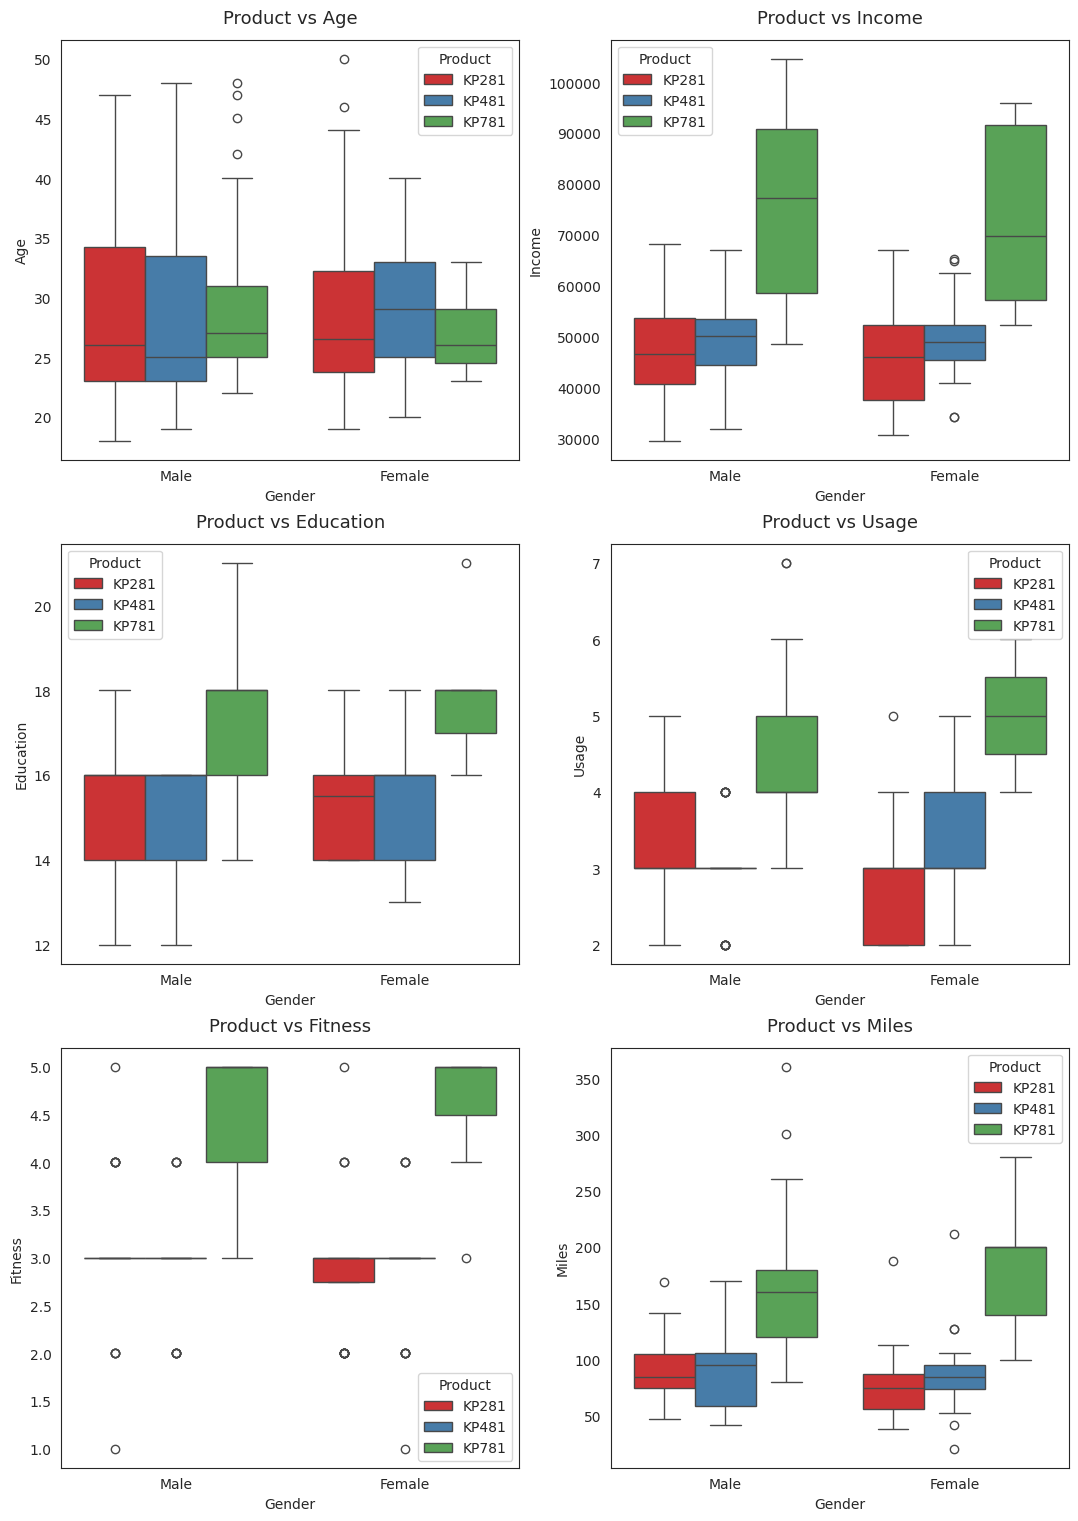

In [ ]:
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit, x='Gender', y=continuous_var[count], hue='Product', ax=axs[i,j], palette='Set1')
        axs[i,j].set_title(f"Product vs {continuous_var[count]}", pad=12, fontsize=13)
        count += 1

#**Insights**

##**Customer Profile for KP281 Treadmill:**

**Age:** 18-35 (primary), with some between 35-50.

**Education:** 13 years or above.

**Income:** Below USD 60,000 annually.

**Fitness Level:** Moderately active (scale 2-4).

**Usage:** Plans to use the treadmill 2-4 times per week.

**Running Mile:** Aims to run or walk 20-50 miles weekly.

Affordability and ease of use are likely key factors for choosing KP281. This suggests they might be new to fitness or budget-conscious.

##**Customer Profile for KP481 Treadmill:**

**Age:** 18-35 (primary), with some between 35-50.

**Education:** 13 years or above.

**Income:** Between USD 40,000 and USD 80,000 annually (wider range compared to KP281).

**Fitness Level:** Moderately active to somewhat fit (scale 2-4).

**Usage:** Plans to use the treadmill 2-4 times per week.

**Running Mile:** Aims to run or walk up to 100 miles weekly.

Compared to KP281 buyers, KP481 customers might have a slightly higher budget or be slightly more experienced exercisers seeking a balance between affordability and features.

##**Customer Profile for KP781 Treadmill:**

**Age:** 18-35 (primary).

**Education:** 15 years or above (possibly indicating higher disposable income).

**Income:** USD 80,000 and above annually (highest income range).

**Fitness Level:** Fit to very fit (scale 3-5).

**Usage:** Plans to use the treadmill 4-7 times per week (most frequent usage).

**Running Mile:** Aims to run or walk over 120 miles weekly (highest mile).

KP781 buyers prioritize advanced features, likely due to their higher fitness goals, frequent usage plans, and potentially higher disposable income.

# **Find the probability that the customer buys a product based on each column.**

In [ ]:
#binning the age values into categories

age_bin = [17,25,35,45,float('inf')]
bin_labels = ['17-25', '25-35', '35-45', '45+']
aerofit['age_group'] = pd.cut(aerofit['Age'],bins = age_bin ,labels = bin_labels)

# binning the income values into categories
income_bin = [0,40000,60000,80000,float('inf')]
income_bin_labels = ['Low Income','Moderate Income','High Income','Very High Income']

aerofit['Income_Range'] = pd.cut(aerofit['Income'],bins = income_bin ,labels = income_bin_labels)

# binning the miles values into categories
miles_range = [0,70,100,200,float('inf')]
miles_bin_label = ['Light', 'Moderate', 'Active', 'Fitness Enthusiast ']
aerofit['miles_group'] = pd.cut(aerofit['Miles'],bins = miles_range,labels = miles_bin_label)

# Calculate the probability of buying a product based on each column
probability_of_buy = {}

for column in aerofit.columns:
    if column not in ( 'Product', 'Age', 'Income', 'Miles'):
        probability_of_buy[column] = pd.crosstab(index=aerofit['Product'], columns=aerofit[column], margins =True, normalize=True).round(2)

# Display the probabilities
for column, prob in probability_of_buy.items():
    print(f"\nProbability of buying a product based on {column}:")
    print('-' * 70)
    print(f'{prob}\n')


Probability of buying a product based on Gender:
----------------------------------------------------------------------
Gender   Female  Male   All
Product                    
KP281      0.22  0.22  0.44
KP481      0.16  0.17  0.33
KP781      0.04  0.18  0.22
All        0.42  0.58  1.00


Probability of buying a product based on Education:
----------------------------------------------------------------------
Education    12    13    14    15    16    18    20    21   All
Product                                                        
KP281      0.01  0.02  0.17  0.02  0.22  0.01  0.00  0.00  0.44
KP481      0.01  0.01  0.13  0.01  0.17  0.01  0.00  0.00  0.33
KP781      0.00  0.00  0.01  0.00  0.08  0.11  0.01  0.02  0.22
All        0.02  0.03  0.31  0.03  0.47  0.13  0.01  0.02  1.00


Probability of buying a product based on MaritalStatus:
----------------------------------------------------------------------
MaritalStatus  Partnered  Single   All
Product                           

##**Insights**

**Education & Income:** Customers with higher education (graduate degrees, professional degrees) and moderate to high income are more likely to buy any treadmill. Interestingly, those with some college education also show a strong preference for the KP281 and KP481 models.

**Marital Status:** Partnered individuals have a higher chance of purchasing any treadmill compared to single customers.

**Usage & Fitness:** People planning to use the treadmill more frequently (5+ times a week) tend to choose the advanced KP781, while those intending to use it 3-4 times a week favor the KP281. Interestingly, the data suggests a higher fitness level might correlate with a preference for the KP281.

**Activity Level:** Customers with a more active lifestyle (expecting to walk/run 100-200 miles weekly) are more likely to choose the KP781, while those with a lighter activity level (0-70 miles) lean towards the KP281. Fitness enthusiasts (over 200 miles) show a surprisingly lower overall purchase probability across all models.

**Age & Income Range:** Customers aged 17-25 show a preference for the KP281, while other age groups have similar probabilities for all models. Income plays a role, with moderate to high earners favoring the KP281 and KP481, while low-income customers gravitate towards the KP781. Very high earners show a preference for both the KP781 and KP481.

**Gender:** While not explicitly mentioned in this summary, previous analysis might have indicated a higher proportion of male customers. .

**Check the correlation among different factors**

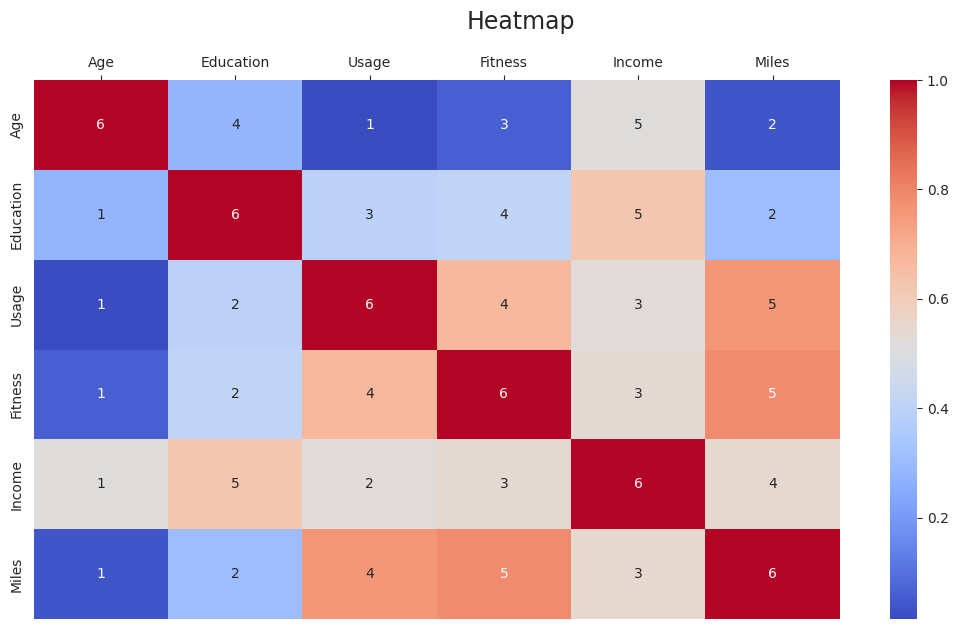

In [ ]:
correlation_matrix = aerofit.corr(method='pearson', numeric_only = True)

# Display the heatmap of the correlation matrix:
plt.figure(figsize=(13,7))
plt.suptitle('Heatmap', fontsize= 17)
sns.heatmap(correlation_matrix, annot=correlation_matrix.rank(axis="columns"), cmap='coolwarm').xaxis.tick_top()
plt.show()

##**Insights**

We see a clear link between **usage** and **fitness level**. People who use treadmills more frequently tend to be fitter. This reinforces the core value proposition of treadmills as effective fitness tools.

**Education** plays a significant role. It positively correlates with **income**, suggesting higher education leads to higher earning potential. Interestingly, education also shows a moderate correlation with fitness level and usage. This suggests individuals with higher education are more likely to prioritize fitness and utilize treadmills regularly.

The analysis shows that **age** has relatively weak correlations with other variables. This suggests that age alone may not strongly influence factors like income, fitness level, or usage patterns.

By understanding these correlations, **Aerofit** can create targeted marketing campaigns and product offerings that resonate with specific customer segments. This, in turn, leads to increased sales, customer satisfaction, and a healthier, fitter customer base.

##**Final Recommendations**

**Focus on Fitness Benefits:** Emphasize how regular treadmill usage improves fitness and overall health in all marketing materials. Highlight the "get fit" message to resonate with customers across demographics.

**Segment-Specific:** Tailor messages based on customer profiles. For the KP281, target females and lower-income customers, emphasizing affordability and achieving fitness goals. For the KP781, target higher-income customers (possibly male) by highlighting advanced features, longer mileage, and high performance.

**Analyze product preference and purchase probability** data to guide product development. Consider enhancing features or affordability of the KP281 for wider appeal, while exploring ways to cater to high-income customer needs for the KP781.

**Wellness Campaign:** Develop educational content promoting the connection between education, income, and fitness. Highlight how higher education can lead to healthier lifestyles and how treadmills contribute to an active lifestyle.

Collaborate with **fitness influencers** targeting higher-income / high-fitness-level. This expands brand reach and builds credibility with the target audience.

Continuously collect **customer feedback and usage data** to understand customer preferences, needs, and satisfaction. This data will fuel customer-centric product development and marketing efforts.

Overall, By segmenting the audience, tailoring marketing and product development, and fostering customer engagement, Aerofit can drive sales, build brand loyalty, and establish itself as a leader in the fitness equipment market.